# Clustering_analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Load dataset

In [3]:
data1 = pd.read_excel("./EastWestAirlines.xlsx", sheet_name="data" )

In [4]:
df = data1.copy()

In [5]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
# Column rename
df.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

In [7]:
#Set ID as Index Column
df.set_index('ID',inplace=True)
df.head(3)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0


### Descriptive Statistics

In [8]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


## EDA 

### Missing values

In [10]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

#### -> No missing values found

### Handle duplicates

In [11]:
df[df.duplicated(keep=False)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3393,1000,0,1,1,1,0,0,0,0,1597,0
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [12]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3998 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3998 non-null   int64
 1   Qual_miles         3998 non-null   int64
 2   cc1_miles          3998 non-null   int64
 3   cc2_miles          3998 non-null   int64
 4   cc3_miles          3998 non-null   int64
 5   Bonus_miles        3998 non-null   int64
 6   Bonus_trans        3998 non-null   int64
 7   Flight_miles_12mo  3998 non-null   int64
 8   Flight_trans_12    3998 non-null   int64
 9   Days_since_enroll  3998 non-null   int64
 10  Award              3998 non-null   int64
dtypes: int64(11)
memory usage: 374.8 KB


In [13]:
import ydata_profiling as pp

In [14]:
EDA_report = pp.ProfileReport(df)
EDA_report.to_file(output_file='EDA_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2533.49it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data visualisation

### Analysis of Award Status in Customer Data

#### Counting Customers with and without Award:

In [15]:
countNotermdeposit = len(df[df.Award == 0])
counthavetermdeposit = len(df[df.Award == 1])
print("Percentage of Customers without an Award: {:.2f}%".format((countNotermdeposit / len(df.Award))*100))
print("Percentage of Customers with an Award: {:.2f}%".format((counthavetermdeposit / len(df.Award))*100))

Percentage of Customers without an Award: 62.96%
Percentage of Customers with an Award: 37.04%


Text(0.5, 1.0, 'Whether the client has a Award or not ')

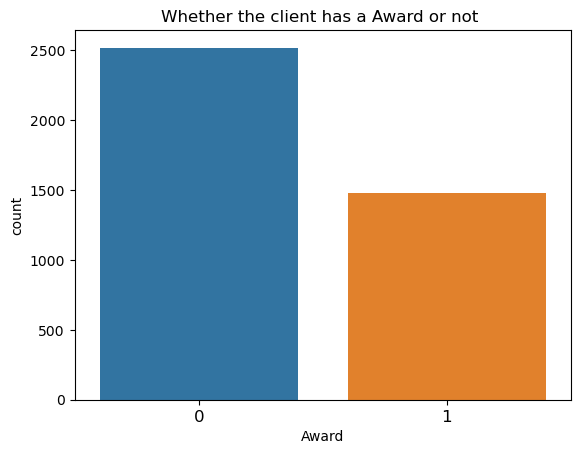

In [106]:
sns.countplot(x='Award', data=df,
              order=df['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ')

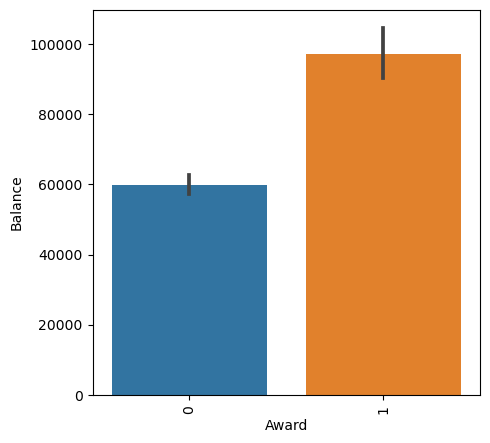

In [107]:
# Balance : Number of miles eligible for award travel
plt.figure(figsize = (5,5))
Balance = df[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

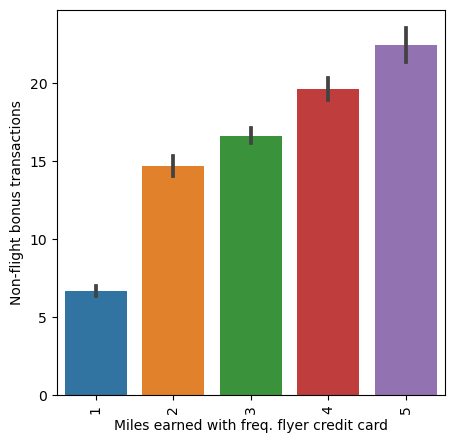

In [108]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions
plt.figure(figsize = (5,5))
sorted_data = df[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

#### So, people who fly more frequently use bonus transactions more

### Kernel Density Estimation

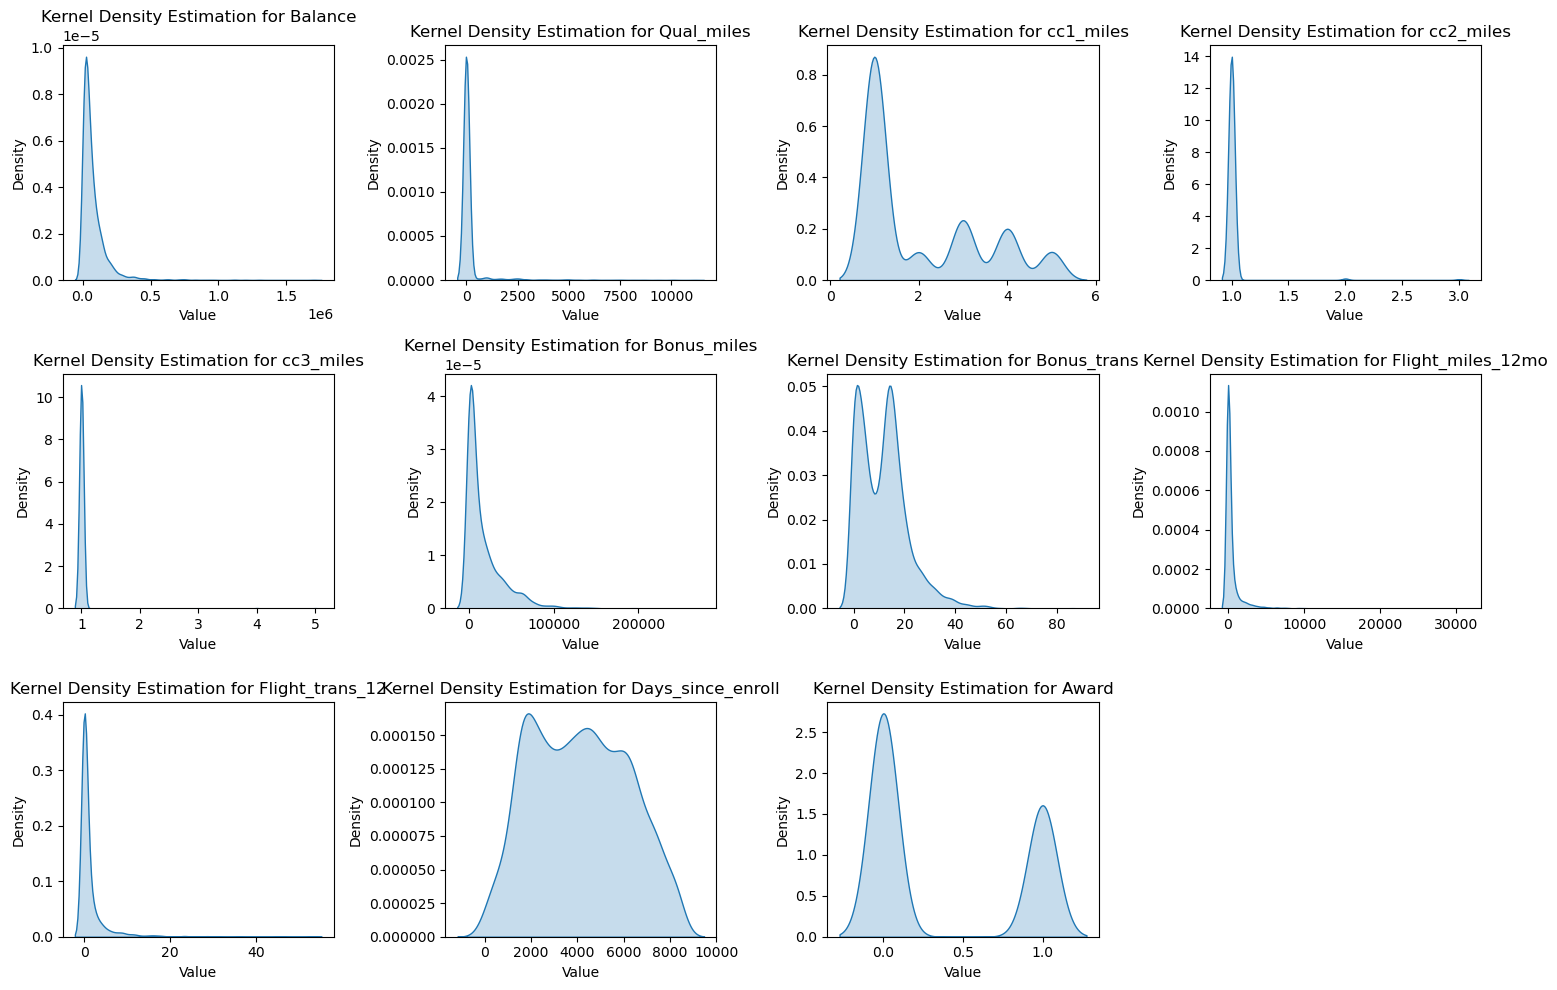

In [109]:
# Create a figure containing subplots
fig = plt.figure(figsize=(15, 10))

# Plot KDE for each feature
for i, column in enumerate(df.columns):
    ax = fig.add_subplot(3, 4, i + 1)
    sns.kdeplot(df[column], fill=True, ax=ax)
    ax.set_title(f'Kernel Density Estimation for {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
plt.tight_layout()
plt.show()

### Histogram plot 

In [20]:
%matplotlib inline

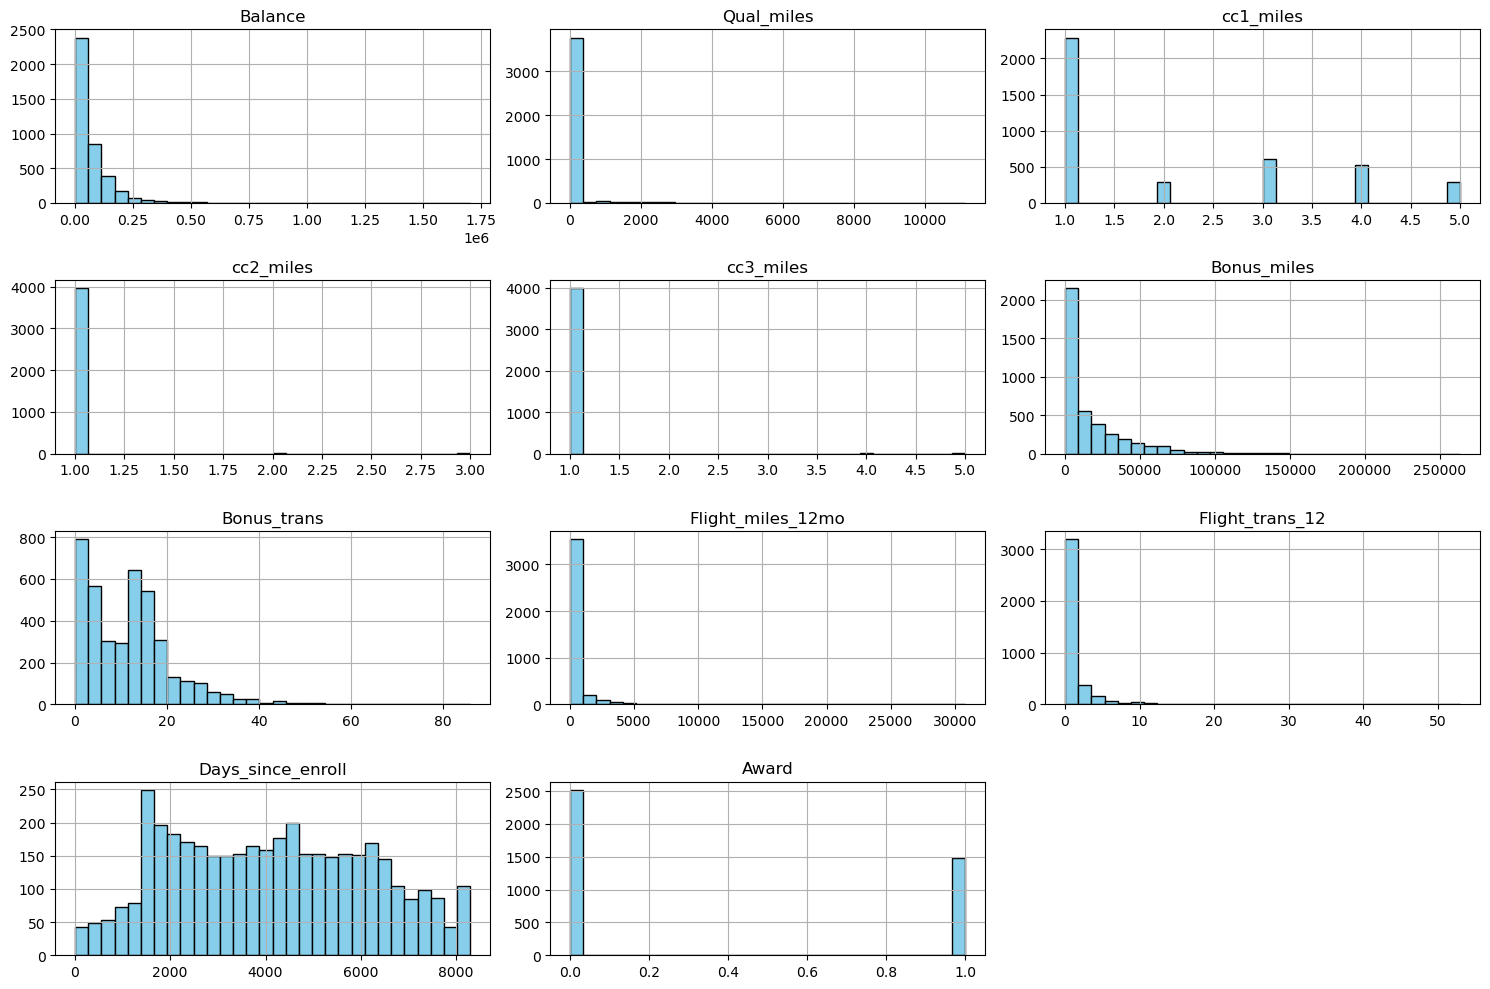

In [111]:
df.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

### Boxplot to Detect Outliers

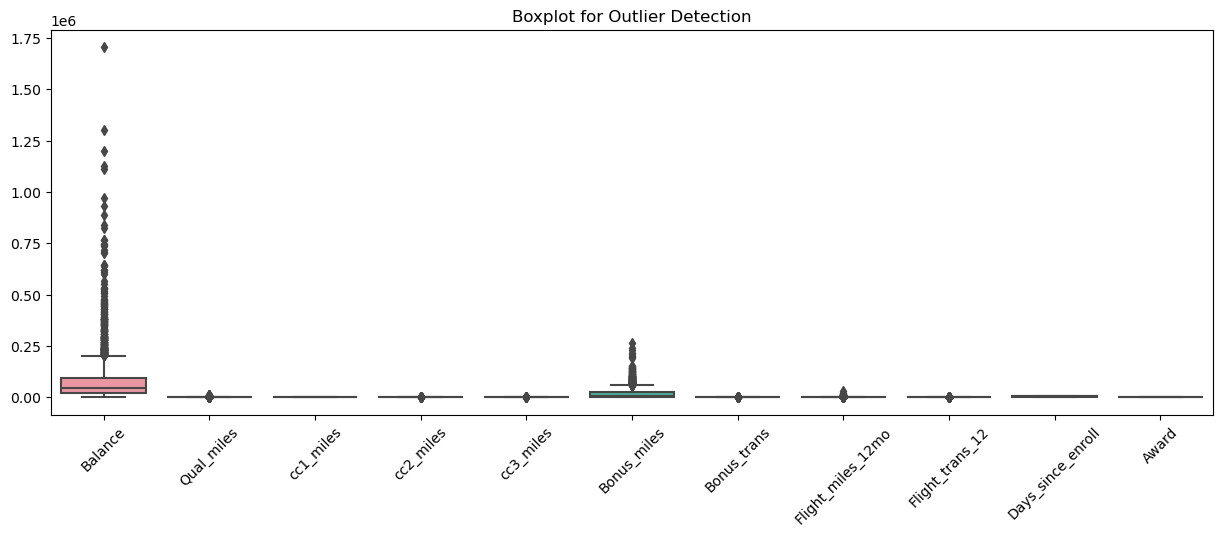

In [22]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [23]:
from scipy.stats import iqr

### function to remove outliers

In [24]:
def remove_outliers_iqr(data, cols, factor=1.5):
    mask = pd.Series(True, index=data.index)
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        mask &= data[col].between(lower, upper)
    return data[mask]

cleaned_data = remove_outliers_iqr(df, ['Balance', 'Bonus_miles', 'Days_since_enroll'], factor=2)
print("Rows before:", len(df))
print("Rows after :", len(cleaned_data))

Rows before: 3998
Rows after : 3708


### Correlation heatmap

In [25]:
corr_matrix = cleaned_data.corr().abs()
corr_matrix

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.079282,0.418101,0.022167,0.025791,0.450712,0.361861,0.193429,0.188689,0.238286,0.101786
Qual_miles,0.079282,1.000000,0.002965,0.011847,0.004780,0.014763,0.024544,0.097530,0.113491,0.002801,0.076177
cc1_miles,0.418101,0.002965,1.000000,0.066974,0.000791,0.899724,0.583490,0.011989,0.019422,0.196448,0.304283
cc2_miles,0.022167,0.011847,0.066974,1.000000,0.003259,0.004169,0.065250,0.005483,0.019436,0.005797,0.000314
cc3_miles,0.025791,0.004780,0.000791,0.003259,1.000000,0.074752,0.036786,0.008276,0.010647,0.006618,0.009986
Bonus_miles,0.450712,0.014763,0.899724,0.004169,0.074752,1.000000,0.613929,0.114088,0.100860,0.179737,0.356050
Bonus_trans,0.361861,0.024544,0.583490,0.065250,0.036786,0.613929,1.000000,0.277522,0.339623,0.137092,0.298940
Flight_miles_12mo,0.193429,0.097530,0.011989,0.005483,0.008276,0.114088,0.277522,1.000000,0.834323,0.023460,0.189484
Flight_trans_12,0.188689,0.113491,0.019422,0.019436,0.010647,0.100860,0.339623,0.834323,1.000000,0.040336,0.217147
Days_since_enroll,0.238286,0.002801,0.196448,0.005797,0.006618,0.179737,0.137092,0.023460,0.040336,1.000000,0.160621


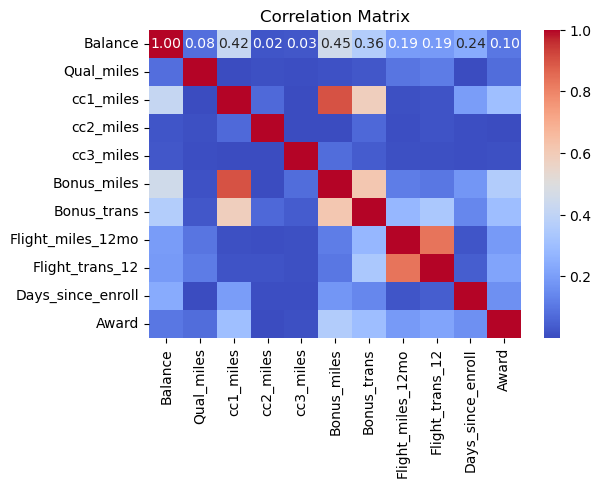

In [26]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [27]:
# Keep only the upper triangle (to avoid duplicate pairs)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.8
to_drop = [col for col in upper.columns if any(upper[col] > 0.8)]

# Show which columns will be dropped
print("Highly correlated columns to drop:", to_drop)

Highly correlated columns to drop: ['Bonus_miles', 'Flight_trans_12']


In [28]:
df1 = cleaned_data.drop(columns=['Bonus_miles', 'Flight_trans_12'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3708 entries, 1 to 4021
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3708 non-null   int64
 1   Qual_miles         3708 non-null   int64
 2   cc1_miles          3708 non-null   int64
 3   cc2_miles          3708 non-null   int64
 4   cc3_miles          3708 non-null   int64
 5   Bonus_trans        3708 non-null   int64
 6   Flight_miles_12mo  3708 non-null   int64
 7   Days_since_enroll  3708 non-null   int64
 8   Award              3708 non-null   int64
dtypes: int64(9)
memory usage: 289.7 KB


In [29]:
df1.reset_index(drop=True, inplace=True)

In [30]:
df1.var()

Balance              2.657492e+09
Qual_miles           5.645545e+05
cc1_miles            1.605549e+00
cc2_miles            2.164620e-02
cc3_miles            6.466963e-03
Bonus_trans          7.736692e+01
Flight_miles_12mo    1.281158e+06
Days_since_enroll    4.200801e+06
Award                2.248287e-01
dtype: float64

## Data Preprocessing

### Standardizing the Data -  Scale features

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
scaled_data = scaler.fit_transform(df1)

## Building the model

## K Means

In [34]:
from sklearn.cluster import KMeans

In [35]:
model1 = KMeans(n_clusters=3, random_state=42)

In [36]:
model1.fit(scaled_data)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [37]:
model1.predict(scaled_data)

array([1, 1, 1, ..., 0, 1, 1])

In [38]:
model1.inertia_

24655.611143553317

In [39]:
model1.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [40]:
data4 = df1.copy()

In [41]:
data4["labels"] = model1.labels_

In [42]:
data4.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll,Award,labels
0,28143,0,1,1,1,1,0,7000,0,1
1,19244,0,1,1,1,2,0,6968,0,1
2,41354,0,1,1,1,4,0,7034,0,1
3,14776,0,1,1,1,1,0,6952,0,1
4,97752,0,4,1,1,26,2077,6935,1,0


In [43]:
data4["labels"].value_counts()

labels
1    2151
0    1392
2     165
Name: count, dtype: int64

In [44]:
grp = data4.groupby('labels')

In [45]:
for x,y in grp:
    print(y)
    print('__________________________________'*4)

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_trans  \
4       97752           0          4          1          1           26   
6       84914           0          3          1          1           25   
8      104860           0          3          1          1           28   
10      96522           0          5          1          1           19   
11      43382           0          2          1          1           20   
...       ...         ...        ...        ...        ...          ...   
3688    57793           0          3          1          1           15   
3689    28867           0          3          1          1           28   
3694    59017           0          4          1          1           25   
3700    39142           0          3          1          1           28   
3705    73597           0          3          1          1            8   

      Flight_miles_12mo  Days_since_enroll  Award  labels  
4                  2077               6

In [46]:
grp.agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll,Award
labels,,,,,,,,,
0,86966.608477,35.447557,3.234195,1.002874,1.002874,17.525144,266.523707,4720.653736,0.546695
1,32867.175267,38.483496,1.094375,1.021850,1.001860,5.781497,186.571827,3558.171083,0.181776
2,96570.290909,2105.751515,1.818182,1.012121,1.012121,18.460606,3763.545455,4078.987879,0.684848


In [47]:
from sklearn.metrics import silhouette_score

In [48]:
score = silhouette_score(scaled_data,model1.labels_)
score

0.28022976028378754

## Hyperparameter tuning

In [49]:
!pip install kneed

In [50]:
from kneed import KneeLocator

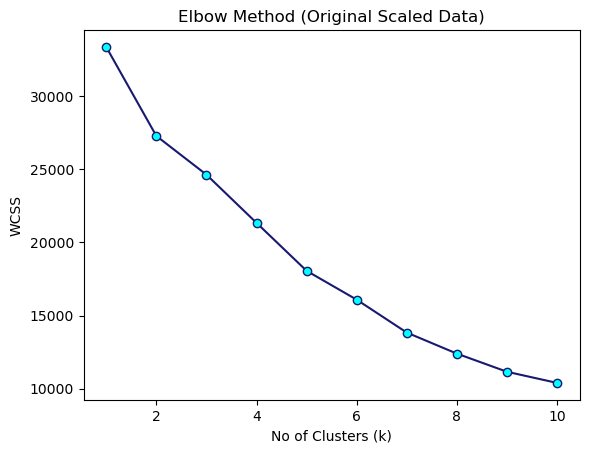

In [51]:
wcss = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(scaled_data)
    wcss.append(model.inertia_)

plt.plot(range(1, 11), wcss, marker='o', color='midnightblue', mfc='cyan')
plt.title('Elbow Method (Original Scaled Data)')
plt.xlabel('No of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [52]:
k_range = range(1, 11)
kneedle = KneeLocator(k_range, wcss, curve="convex", direction="decreasing")
print("Optimal number of clusters:", kneedle.elbow)

Optimal number of clusters: 5


### Rebuild the model

In [53]:
# Fit KMeans
model2 = KMeans(n_clusters=5, n_init=10, random_state=0)
model2.fit_predict(scaled_data)

array([1, 1, 1, ..., 2, 1, 1])

In [54]:
score = silhouette_score(scaled_data, model2.labels_)
print("Silhouette Score after hyperparameter tuning:", score)

Silhouette Score after hyperparameter tuning: 0.2979514527488677


### Trying dimensionality reduction with PCA 

In [55]:
from sklearn.decomposition import PCA

In [56]:
# Apply PCA
pca = PCA(n_components=2)  
reduced_data = pca.fit_transform(scaled_data)

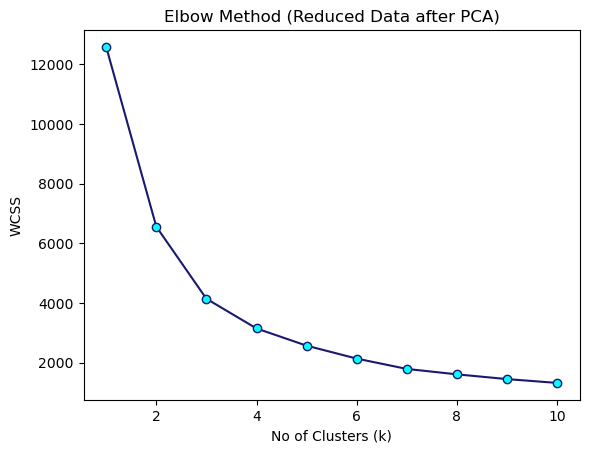

In [57]:
wcss = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(reduced_data)
    wcss.append(model.inertia_)

plt.plot(range(1, 11), wcss, marker='o', color='midnightblue', mfc='cyan')
plt.title('Elbow Method (Reduced Data after PCA)')
plt.xlabel('No of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [58]:
k_range = range(1, 11)
kneedle = KneeLocator(k_range, wcss, curve="convex", direction="decreasing")
print("Optimal number of clusters:", kneedle.elbow)

Optimal number of clusters: 3


### Rebuild the model with reduced data from pca and the k value obtained from elbow plot 

In [59]:
# Fit KMeans
model2 = KMeans(n_clusters=3, n_init=10, random_state=0)
model2.fit_predict(reduced_data)

array([0, 0, 0, ..., 1, 0, 0])

In [60]:
score = silhouette_score(reduced_data, model2.labels_)
print("Silhouette Score after PCA:", score)

Silhouette Score after PCA: 0.5336946252081687


### Result:

Without PCA, clustering on high-dimensional scaled data produced clusters with less separation (Silhouette Score: 0.29).

With PCA, the cluster separation improved considerably (Silhouette Score: 0.53).

In [61]:
data5 = df1.copy()

In [62]:
data5["labels"] =  model2.labels_

In [63]:
data5.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll,Award,labels
0,28143,0,1,1,1,1,0,7000,0,0
1,19244,0,1,1,1,2,0,6968,0,0
2,41354,0,1,1,1,4,0,7034,0,0
3,14776,0,1,1,1,1,0,6952,0,0
4,97752,0,4,1,1,26,2077,6935,1,1


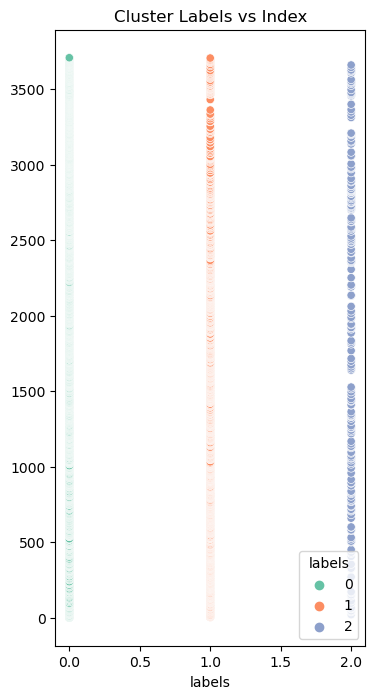

In [64]:
plt.figure(figsize=(4, 8))
sns.scatterplot(x=data5['labels'], y=data5.index, hue=data5['labels'], palette='Set2')
plt.title('Cluster Labels vs Index')
plt.show()

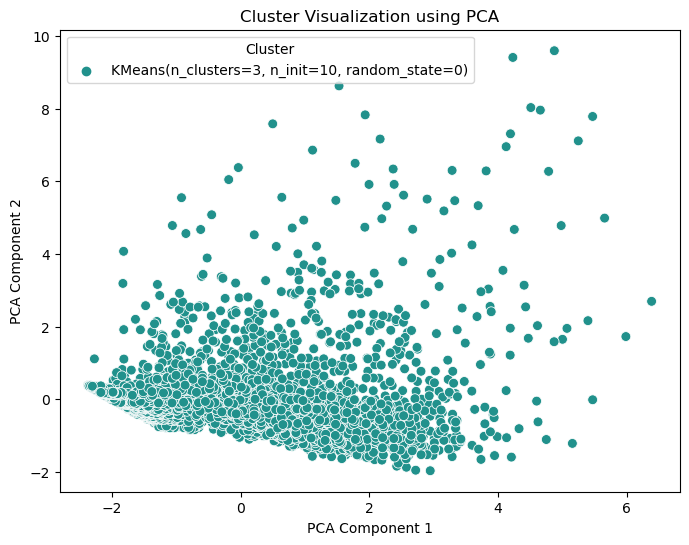

In [65]:
# Create a scatter plot of the clusters in PCA-reduced space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=model2, palette='viridis', s=50)
plt.title('Cluster Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


### Interpretation:

#### 1. Cluster Labels vs Index Plot (KMeans)

This plot shows the cluster labels assigned to each data point by KMeans, arranged by their index.

Three distinct vertical stacks indicate that the model has successfully categorized the data into three clusters.

The fairly balanced distribution suggests clusters are being populated reasonably, though it doesn’t provide spatial separation insight.

#### 2. PCA-Reduced Cluster Scatter Plot (KMeans)

The 2D scatter plot visualizes how data points are grouped into clusters based on their PCA-reduced components.

While clusters are formed, noticeable overlaps remain, implying that the clustering isn’t perfectly distinct in the first two principal components.

The spread and density of points suggest that while the model detects patterns, cluster boundaries aren’t sharply defined.

## DBSCAN

In [66]:
from sklearn.cluster import DBSCAN

In [67]:
model3 = DBSCAN(eps=0.1, min_samples=5)

In [68]:
model3.fit(reduced_data)

,eps,0.1
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [69]:
model3.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
data6 = df1.copy()

In [71]:
data6["labels"] =  model3.labels_

In [72]:
score = silhouette_score(reduced_data, model3.labels_)
print("Silhouette Score :", score)

Silhouette Score : -0.3046331143323355


In [73]:
grp = data6.groupby('labels')

In [74]:
grp.agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll,Award
labels,,,,,,,,,
-1,89917.325670,841.984674,2.245211,1.095785,1.015326,17.655172,1940.984674,4135.659004,0.622605
0,48806.328749,6.603471,1.848068,1.000327,1.000655,9.374263,92.812050,3970.935167,0.273084
1,126677.315789,0.000000,4.473684,1.000000,1.000000,17.736842,47.368421,6007.368421,1.000000
2,54886.666667,49.083333,1.250000,1.000000,1.000000,9.583333,675.000000,3926.333333,1.000000
3,82000.000000,1034.500000,1.333333,1.166667,1.000000,9.000000,533.333333,5157.000000,0.666667
4,66897.857143,124.642857,1.642857,1.000000,1.000000,17.928571,528.571429,3959.214286,0.857143
5,151495.571429,0.000000,4.285714,1.000000,1.000000,22.571429,185.714286,5497.857143,1.000000
6,117671.538462,145.230769,3.923077,1.000000,1.000000,20.538462,435.153846,4902.615385,0.923077
7,107392.125000,0.000000,3.625000,1.000000,1.000000,20.625000,839.625000,4371.125000,0.875000


In [75]:
df1.groupby('Award').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll
Award,,,,,,,,
0,52235.770774,88.152272,1.652476,1.014327,1.003275,8.862464,221.443717,3780.887024
1,63301.915415,208.864822,2.465613,1.014229,1.001581,14.407905,673.766798,4475.179447


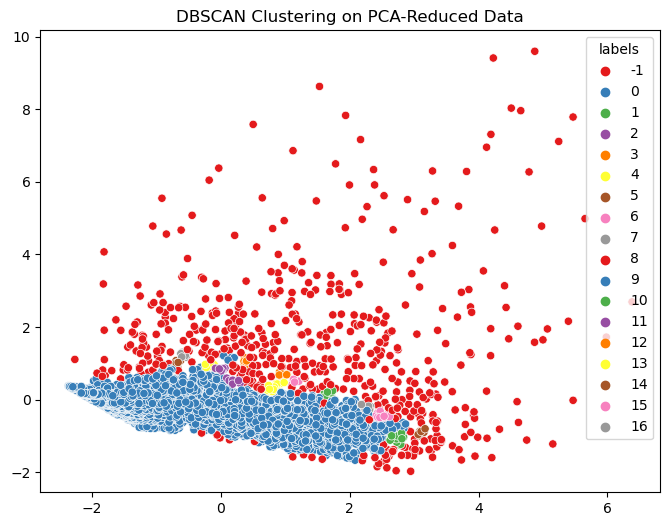

In [76]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=data6["labels"], palette='Set1')
plt.title('DBSCAN Clustering on PCA-Reduced Data')
plt.show()

### Hyperparameter tuning

###  Plot k-distance graph to select eps

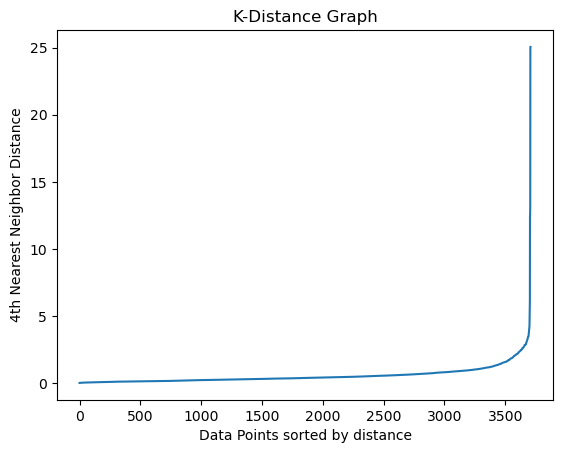

In [77]:
from sklearn.neighbors import NearestNeighbors

# Fit Nearest Neighbors model
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(scaled_data)

# Compute distances to nearest neighbors
distances, indices = nbrs.kneighbors(scaled_data)

# Sort distances and plot
distances = np.sort(distances[:, 4])  # 4 because n_neighbors=5
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.title('K-Distance Graph')
plt.show()


#### the elbow appears around eps ≈ 2– 3

### Test combinations

In [78]:
# Trying multiple eps and min_samples
for eps in [0.5, 1, 2,2.5,3,3.5,4]:
    for min_samples in [3, 5, 10,12,15]:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(scaled_data)
        if len(set(labels)) > 1:  # Silhouette needs at least 2 clusters
            score = silhouette_score(scaled_data, labels)
            print(f"eps={eps}, min_samples={min_samples}, Silhouette Score={score:.3f}")


eps=0.5, min_samples=3, Silhouette Score=-0.091
eps=0.5, min_samples=5, Silhouette Score=-0.087
eps=0.5, min_samples=10, Silhouette Score=-0.086
eps=0.5, min_samples=12, Silhouette Score=-0.075
eps=0.5, min_samples=15, Silhouette Score=-0.090
eps=1, min_samples=3, Silhouette Score=-0.057
eps=1, min_samples=5, Silhouette Score=0.232
eps=1, min_samples=10, Silhouette Score=0.229
eps=1, min_samples=12, Silhouette Score=0.227
eps=1, min_samples=15, Silhouette Score=0.224
eps=2, min_samples=3, Silhouette Score=0.253
eps=2, min_samples=5, Silhouette Score=0.259
eps=2, min_samples=10, Silhouette Score=0.259
eps=2, min_samples=12, Silhouette Score=0.259
eps=2, min_samples=15, Silhouette Score=0.259
eps=2.5, min_samples=3, Silhouette Score=0.562
eps=2.5, min_samples=5, Silhouette Score=0.566
eps=2.5, min_samples=10, Silhouette Score=0.568
eps=2.5, min_samples=12, Silhouette Score=0.564
eps=2.5, min_samples=15, Silhouette Score=0.564
eps=3, min_samples=3, Silhouette Score=0.565
eps=3, min_sample

### Here,
eps = 2.5 and min_samples = 10 is your optimal combination here.

### Rebuild the DBSCAN model

In [79]:
model4 = DBSCAN(eps=2.5, min_samples=10)

In [80]:
model4.fit(scaled_data)

,eps,2.5
,min_samples,10
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [81]:
model4.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
score = silhouette_score(scaled_data, model4.labels_)
print("Silhouette Score :", score)

Silhouette Score : 0.5675760969527186


In [83]:
scaled_data

array([[-0.54066576, -0.17215432, -0.73396332, ..., -0.33201886,
         1.45524763, -0.71958737],
       [-0.71331463, -0.17215432, -0.73396332, ..., -0.33201886,
         1.43963261, -0.71958737],
       [-0.28436007, -0.17215432, -0.73396332, ..., -0.33201886,
         1.47183859, -0.71958737],
       ...,
       [ 0.34118411, -0.17215432,  0.84465384, ..., -0.33201886,
        -1.27640476,  1.38968532],
       [-0.02157448, -0.17215432, -0.73396332, ...,  0.10978268,
        -1.27689273, -0.71958737],
       [-1.02815292, -0.17215432, -0.73396332, ..., -0.33201886,
        -1.27835664, -0.71958737]])

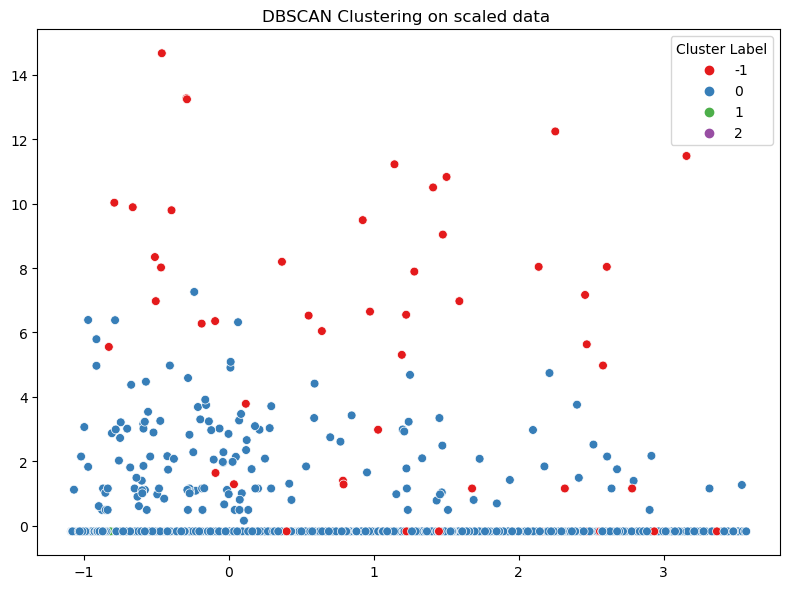

In [84]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    x=scaled_data[:, 0],
    y=scaled_data[:, 1],
    hue=model4.labels_,         
    palette='Set1',             
    legend='full',           
    s=40                        
)

plt.title('DBSCAN Clustering on scaled data ')
plt.legend(title='Cluster Label')
plt.tight_layout()
plt.show()


In [85]:
labels = model4.labels_
print("Clusters found:", len(set(labels)) - (1 if -1 in labels else 0))
print("Noise points:", list(labels).count(-1))

Clusters found: 3
Noise points: 68


In [86]:
from sklearn.manifold import TSNE

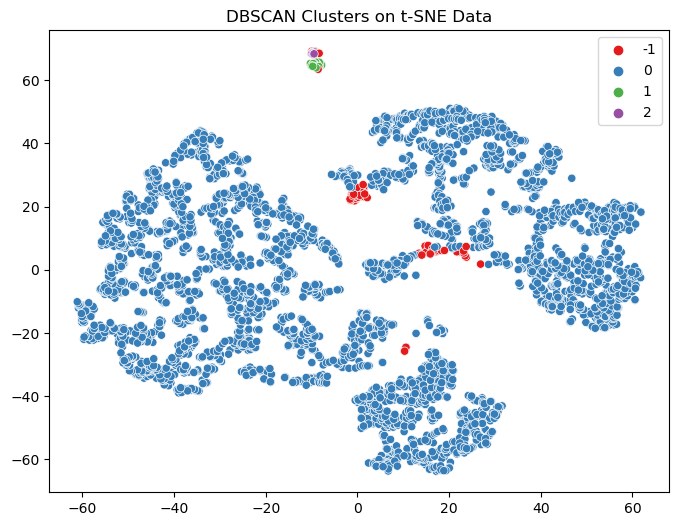

In [87]:
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=model4.labels_, palette='Set1')
plt.title("DBSCAN Clusters on t-SNE Data")
plt.show()

### DBSCAN result summary:
In the first approach, PCA was used to reduce the data to two dimensions to enable visualization and potentially simplify the clustering process. However, the resulting Silhouette Score was -0.3046, indicating poor clustering performance. A negative Silhouette Score suggests that many data points may have been assigned to the wrong clusters or are closer to points in other clusters, likely due to significant information loss during dimensionality reduction. This result implies that PCA distorted the original structure of the data, making it unsuitable for effective density-based clustering in this context.

In the second approach, DBSCAN was applied directly to the scaled data after careful hyperparameter tuning. This method produced a significantly improved Silhouette Score of 0.5676, indicating moderately well-defined clusters with good cohesion and separation. The corresponding scatter plots show that DBSCAN successfully identified three clusters, with one dominant cluster and two smaller ones, as well as a number of outliers labeled as noise. The presence of clearly distinguishable clusters and the improved Silhouette Score confirm that working in the original feature space (after scaling) preserved the intrinsic structure of the data, allowing DBSCAN to form meaningful groupings and effectively detect anomalies.

In conclusion, while PCA-based dimensionality reduction simplifies data visualization, it can degrade clustering performance when important structural features are lost. Applying DBSCAN to scaled, high-dimensional data, supported by appropriate hyperparameter tuning, led to better clustering results both visually and quantitatively.

## Hierarchical_clustering

In [88]:
from sklearn.cluster import AgglomerativeClustering

In [89]:
model_agg1 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')

In [90]:
model_agg1.fit(scaled_data)

,n_clusters,3
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'complete'
,distance_threshold,None
,compute_distances,False


In [91]:
model_agg1.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
data_agg = df1.copy()

In [93]:
data_agg["labels"] = model_agg1.labels_

In [94]:
data_agg.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll,Award,labels
0,28143,0,1,1,1,1,0,7000,0,0
1,19244,0,1,1,1,2,0,6968,0,0


In [95]:
data_agg.groupby("labels").agg("mean")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll,Award
labels,,,,,,,,,
0,55656.173818,57.680241,1.931129,1.014485,1.000547,10.750478,371.352829,4019.092922,0.339710
1,94593.333333,394.000000,1.666667,1.000000,3.666667,22.333333,983.333333,4591.666667,0.333333
2,81721.543478,5811.652174,1.847826,1.000000,1.000000,10.304348,686.347826,3873.326087,0.456522


In [96]:
score = silhouette_score(scaled_data, model_agg1.labels_)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.606


In [97]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [98]:
linked = linkage(reduced_data, method='complete', metric='euclidean')

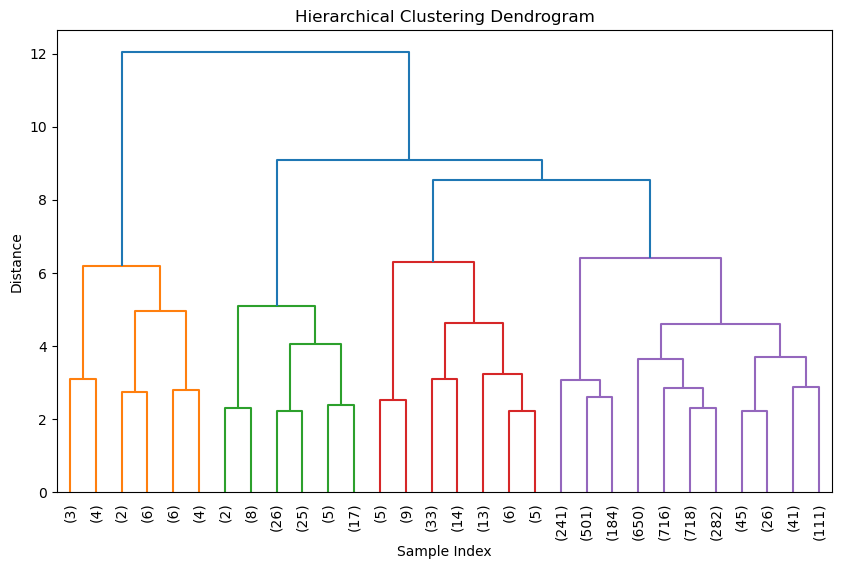

In [99]:
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

## Trying out different linkage types

In [100]:
linkage_types = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan', 'cosine']

for link in linkage_types:
    if link == 'ward':
        # Ward linkage works only with Euclidean distance
        model = AgglomerativeClustering(n_clusters=3, linkage=link)
        labels = model.fit_predict(scaled_data)
        score = silhouette_score(scaled_data, labels)
        print(f"Linkage: {link}, Metric: euclidean, Silhouette Score: {score:.3f}")
    else:
        for met in metrics:
                model = AgglomerativeClustering(n_clusters=3, linkage=link, metric=met)
                labels = model.fit_predict(scaled_data)
                score = silhouette_score(scaled_data, labels)
                print(f"Linkage: {link}, Metric: {met}, Silhouette Score: {score:.3f}")

Linkage: ward, Metric: euclidean, Silhouette Score: 0.225
Linkage: complete, Metric: euclidean, Silhouette Score: 0.606
Linkage: complete, Metric: manhattan, Silhouette Score: 0.664
Linkage: complete, Metric: cosine, Silhouette Score: 0.187
Linkage: average, Metric: euclidean, Silhouette Score: 0.862
Linkage: average, Metric: manhattan, Silhouette Score: 0.766
Linkage: average, Metric: cosine, Silhouette Score: 0.252
Linkage: single, Metric: euclidean, Silhouette Score: 0.862
Linkage: single, Metric: manhattan, Silhouette Score: 0.862
Linkage: single, Metric: cosine, Silhouette Score: 0.664


In [101]:
linked = linkage(scaled_data, method='single', metric='euclidean') 

### Rebuilding the model

In [102]:
model_agg2 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')

In [103]:
model_agg2.fit(scaled_data)

,n_clusters,3
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'single'
,distance_threshold,None
,compute_distances,False


In [104]:
score = silhouette_score(scaled_data, model_agg2.labels_)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.862


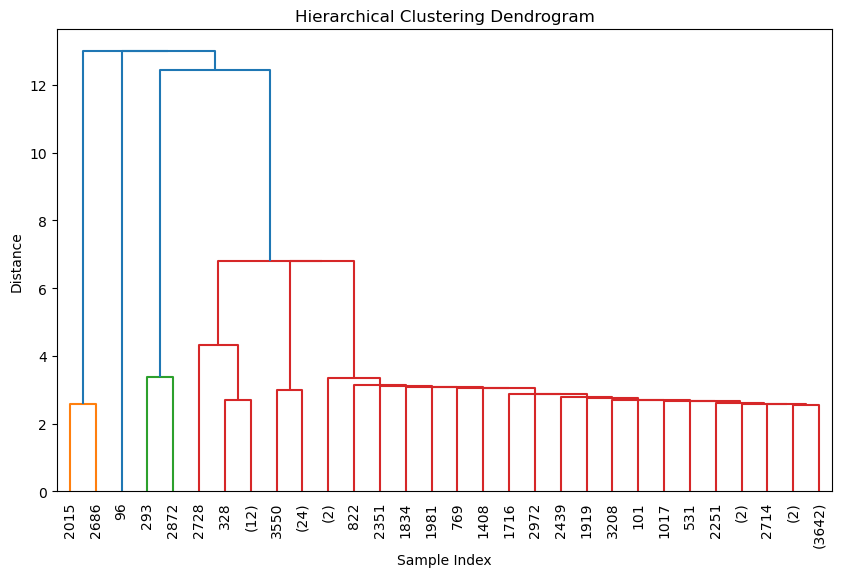

In [105]:
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

### Result:

The dendrogram suggested a natural division into 3 clusters, supporting the choice of n_clusters=3.

Single linkage successfully separated distinct groups in this dataset.

Silhouette Score of 0.862 indicates this model captured meaningful structures, outperforming other clustering approaches you tried (like KMeans on scaled and PCA data).

So, Agglomerative Clustering with single linkage proved to be highly effective for this dataset, offering both clear visual cluster formation through the dendrogram and quantitative validation through a high silhouette score.